## Key Concepts and Models to Price derivatices

1. Brownian Motion
2. Geometric brownian motion
3. Risk Neutral pricing


## Steps of Pricing derivatives

### Step 1: Simulate Stock prices using GBM
- In black-Scholes worl, the stock prcice follows
$$dS_t = \mu S_t dt + \sigma S_tdW_t$$

under risk-neutral measures, we sue:
$$dS_t = rS_t dt + \sigma S_tdW_t$$

where:
- $S_t$: Stock price
- $r$: Risk-free rate
- $\sigma$: volatility
- $dW_t$: Wiener process (Brownian motion increment)

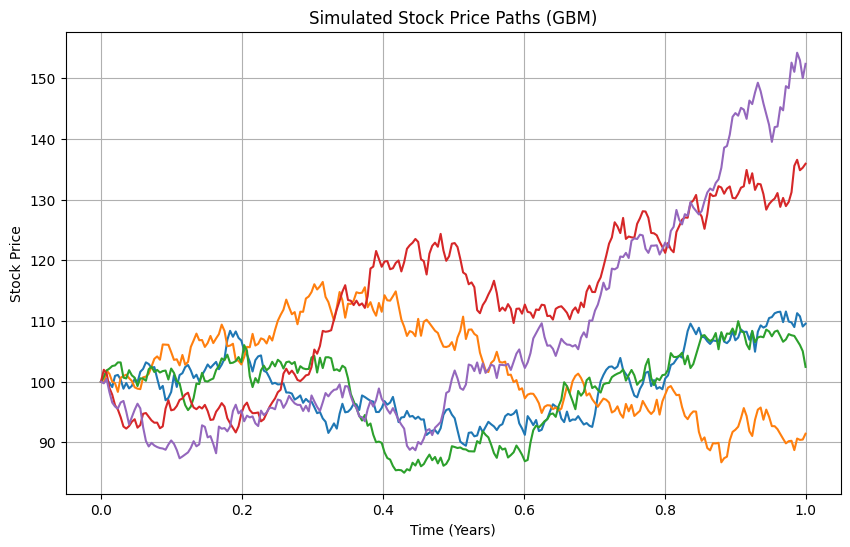

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# params
S0  = 100
T = 1
r = 0.05
sigma = 0.2
n_paths = 5
n_steps = 252
dt = T / n_steps

# Simulating paths
np.random.seed(42)
time = np.linspace(0, T, n_steps)
paths = np.zeros((n_paths, n_steps))
paths[:, 0] = S0

for i in  range(1, n_steps):
    z = np.random.standard_normal(n_paths)
    paths[:, i] = paths[:, i-1] * np.exp((r- 0.5 *sigma**2) * dt + sigma * np.sqrt(dt) * z)

# plotting
plt.figure(figsize=(10, 6))
for path in paths:
    plt.plot(time, path)
plt.title('Simulated Stock Price Paths (GBM)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [10]:
paths

array([[100.        , 100.63974344, 100.35525524, ..., 110.7547793 ,
        109.07300314, 109.54168463],
       [100.        ,  99.83783974, 101.85625209, ...,  90.39914875,
         90.44874257,  91.41447496],
       [100.        , 100.83135232, 101.82311677, ..., 106.02505329,
        105.01400421, 102.42123399],
       [100.        , 101.94950138, 101.36033413, ..., 134.82286811,
        135.23666289, 135.89166936],
       [100.        ,  99.71729959, 100.4132168 , ..., 152.94549253,
        149.99443673, 152.35059761]], shape=(5, 252))

In [7]:
# Parameters
S0 = 100          # Initial stock price
T = 1.0           # Time to maturity (1 year)
r = 0.05          # Risk-free rate
sigma = 0.2       # Volatility
n_paths = 5       # Number of simulated paths
n_steps = 252     # Trading days in a year
dt = T / n_steps  # Time step

# Simulate paths
np.random.seed(42)
time = np.linspace(0, T, n_steps)
paths = np.zeros((n_paths, n_steps))
paths[:, 0] = S0

for i in range(1, n_steps):
    Z = np.random.standard_normal(n_paths)
    paths[:, i] = paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)


In [8]:
paths

array([[100.        , 100.63974344, 100.35525524, ..., 110.7547793 ,
        109.07300314, 109.54168463],
       [100.        ,  99.83783974, 101.85625209, ...,  90.39914875,
         90.44874257,  91.41447496],
       [100.        , 100.83135232, 101.82311677, ..., 106.02505329,
        105.01400421, 102.42123399],
       [100.        , 101.94950138, 101.36033413, ..., 134.82286811,
        135.23666289, 135.89166936],
       [100.        ,  99.71729959, 100.4132168 , ..., 152.94549253,
        149.99443673, 152.35059761]], shape=(5, 252))

### Step 2: Monte Carlo Pricing of a European Call Option

Option pricing formula (Risk neutral)
$$ C=e^{-rT}\dot \epsilon[(S_T-K)^+]$$

We simulate many possible future prices $S_T$ using GBM and take the average payoff, discounted back to today

In [13]:
# Params
K = 100

#Extract final prices from paths
S_T = paths[:,-1]

# Computing payfoff
payoffs = np.maximum(S_T - K, 0)

# Disocunting back to present value
call_price_mc = np.exp(-r * T) * np.mean(payoffs)

print(f"Monte Carlo Estimated Price of European Call Option: ${call_price_mc:.4f}")


Monte Carlo Estimated Price of European Call Option: $19.0636


In [12]:
S_T

array([109.54168463,  91.41447496, 102.42123399, 135.89166936,
       152.35059761])